#### Instalamos dependencias
`pip install pandas matplotlib`

### Punto 1

In [2]:

def eliminar_duplicados(datos_duplicados):
    if not datos_duplicados: # Verifico que se hayan mandado datos
        return 'No se encontraron datos'
    elif len(datos_duplicados) == 1: # Si es un solo dato la devuelvo 
        return datos_duplicados
    
    lista_limpia = list(set(datos_duplicados)) # Los conjuntos no pueden tener datos duplicados, creo uno y le paso la lista duplicada, luego lo convierto a lista con list() y la retorno
    
    return lista_limpia

print(eliminar_duplicados([1, 1, 2, 3, 4, 5, 5, 6, 7]))

[1, 2, 3, 4, 5, 6, 7]


#### Importamos y definimos lo que vamos a utilizar

In [6]:
import pandas as pd
calificaciones = [
{"nombre": "Juan", "matematicas": 85, "ciencias": 90, "historia": 75},
{"nombre": "María", "matematicas": 70, "ciencias": 80, "historia": 85},
{"nombre": "Pedro", "matematicas": 95, "ciencias": 75, "historia": 90},
{"nombre": "Ana", "matematicas": 80, "ciencias": 85, "historia": 80},
{"nombre": "Luis", "matematicas": 75, "ciencias": 70, "historia": 95},
{"nombre": "Sofía", "matematicas": 90, "ciencias": 85, "historia": 75},
{"nombre": "Carlos", "matematicas": 85, "ciencias": 90, "historia": 80},
{"nombre": "Elena", "matematicas": 70, "ciencias": 75, "historia": 85},
{"nombre": "Javier", "matematicas": 80, "ciencias": 85, "historia": 90},
{"nombre": "Laura", "matematicas": 75, "ciencias": 70, "historia": 95},
{"nombre": "Diego", "matematicas": 90, "ciencias": 85, "historia": 75},
{"nombre": "Paula", "matematicas": 85, "ciencias": 90, "historia": 80},
{"nombre": "Carmen", "matematicas": 70, "ciencias": 75, "historia": 85}
]
df = pd.DataFrame(calificaciones, columns=['nombre', 'matematicas', 'ciencias', 'historia'])

#### Definimos la funcion para encontrar el promedio de notas

In [12]:
def calcular_promedio(df, materia):

    df_promedio = pd.DataFrame(df[f'{materia}']) # Genero un df con el nombre de la materia que recibo como parametro
    
    df_promedio['Fi'] = df_promedio[f'{materia}'].cumsum() # Agrego una columna de frecuencia simple acumulada para sumar la cantidad de notas
    
    promedio = df_promedio['Fi'].iloc[-1] / len(df_promedio['Fi']) # Divido la Fi por la cantidad de notas y obtengo el promedio

    return f'El promedio de {materia} es {promedio}' # Devuelvo con su mensaje correspondiente

print(calcular_promedio(df, 'matematicas'))
print(calcular_promedio(df, 'ciencias'))
print(calcular_promedio(df, 'historia'))

El promedio de matematicas es 80.76923076923077
El promedio de ciencias es 81.15384615384616
El promedio de historia es 83.84615384615384


#### Definimos una funcion para encontrar la calificacion mas alta

Debemos pasarle la materia la cual queremos encontrar la nota

In [10]:
def encontrar_calf_mas_altas(df, materia):

    dataframe = pd.DataFrame(df[['nombre', f'{materia}']]) # Creo un df con el nombre (del estudiante) y la materia que se ingrese por parametros
    
    ordered_df = dataframe.sort_values(by=f'{materia}', ascending=False) # utilizo la funcion sort_values(), pasandole como parametro la materia, en orden descendiente, por lo que la nota mayor estara en la posicion 0
    nombre_alumno = ordered_df.iloc[0]['nombre'] # Accedo a esa posicion y obtengo el nombre
    nota_alumno = ordered_df.iloc[0][f'{materia}'] # Accedo a la misma posicion y obtengo la nota

    return f'la calificacion mas alta de {materia} es de {nombre_alumno} y es de {nota_alumno}' # devuelvo mensaje con las variables correspondientes

print(encontrar_calf_mas_altas(df, 'matematicas'))
print(encontrar_calf_mas_altas(df, 'ciencias'))
print(encontrar_calf_mas_altas(df, 'historia'))

la calificacion mas alta de ciencias es de Juan y es de 90


#### Funcion para obtener el porcentaje de aprobados de cada materia

In [13]:
def porcentaje_aprobados(df, materia):

    aprobados = df[df[materia] >= 60] # guardo en la variable aprobados solamente los datos del df en la cual la nota de la materia sea mayor igual a 60

    porcentaje = (len(aprobados) / len(df)) * 100 # saco el porcentaje dividiendo la cantidad de aprobados por la cantidad de registros que hay en notas, y eso lo multiplico por 100
    
    return f'El porcentaje de estudiantes que aprobaron {materia} es {porcentaje}%' # devuelvo mensaje correspondiente

print(porcentaje_aprobados(df, 'matematicas'))
print(porcentaje_aprobados(df, 'ciencias'))
print(porcentaje_aprobados(df, 'historia'))

El porcentaje de estudiantes que aprobaron matematicas es 100.0%
El porcentaje de estudiantes que aprobaron ciencias es 100.0%
El porcentaje de estudiantes que aprobaron historia es 100.0%


#### Funcion para obtener el promedio de calificacion por estudiante

In [14]:
def promedio_notas_por_estudiante(df):
    # Creo un df que tenga los mismos datos del original pero agregandole otra columna llamada promedio
    df_promedio_estudiantes = pd.DataFrame(df, columns=['nombre', 'matematicas', 'ciencias', 'historia', 'promedio'])
    # Sumo las tres notas del mismo registro y lo guardo en promedio
    df_promedio_estudiantes['promedio'] = df_promedio_estudiantes['matematicas'] + df_promedio_estudiantes['ciencias'] + df_promedio_estudiantes['historia']
    # Y finalmente divido promedio por 3 para obtener el promedio final de nota por estudiante
    df_promedio_estudiantes['promedio'] = (df_promedio_estudiantes['promedio'] / 3).round()

    # Borro las columnas que ya no necesito con el metodo drop() pasandole las columnas que quiero que elimine, el axis en uno para que borre la columna por completo y no solamente los registros y por ultimo le paso inplace=True para que modifique el df original
    df_promedio_estudiantes.drop(labels=['matematicas', 'ciencias', 'historia'], axis=1, inplace=True)

    return df_promedio_estudiantes


print(promedio_notas_por_estudiante(df))

    nombre  promedio
0     Juan      83.0
1    María      78.0
2    Pedro      87.0
3      Ana      82.0
4     Luis      80.0
5    Sofía      83.0
6   Carlos      85.0
7    Elena      77.0
8   Javier      85.0
9    Laura      80.0
10   Diego      83.0
11   Paula      85.0
12  Carmen      77.0


# Punto 3

#### Primero guardamos los datos en una variable utilizando la funcion previamente definida
Tambien tenemos que importar la libreria para crear el grafico 

In [16]:
import matplotlib.pyplot as plt
datos = promedio_notas_por_estudiante(df)

Luego definimos la funcion y le pasamos los datos como parametro

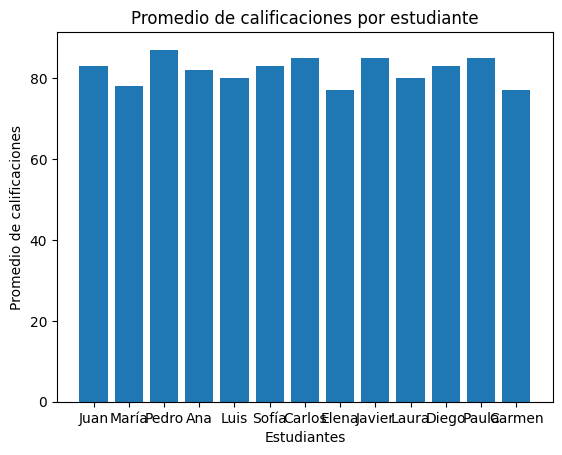

In [17]:
def crear_grafico(datos):

    nombres = datos['nombre'] # Obtengo los nombres de los estudiantes y los promedios
    promedios = datos['promedio']

    plt.bar(nombres, promedios) # Creo el gráfico de barras

    # Personalizacion
    plt.xlabel('Estudiantes')
    plt.ylabel('Promedio de calificaciones')
    plt.title('Promedio de calificaciones por estudiante')

    plt.show() # Muestro el gráfico

crear_grafico(datos)